# Train e Test del dataset Mushroom

## Import delle librerie

In [78]:
import pandas as pd
import numpy as np
import sklearn as sl
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier


## Caricamento dei dataset

Ora si procede con il caricamento dei dataset.

In [37]:
url_train = 'train.csv'
url_val = 'validation.csv'
url_test = 'test.csv'

In [38]:
train_data = pd.read_csv(url_train)
val_data = pd.read_csv(url_val)
test_data =pd.read_csv(url_test)

Verifichiamo che siano stati importati correttamente

In [39]:
if train_data is None or val_data is None or test_data is None:
    raise("I dataset non sono stati caricati correttamente.")

## Analisi del dataset di train

Ora analizziamo il dataset di train per avere maggiori informazioni per addestrare il modello.

In [40]:
# Numero di righe e colonne nel dataset
print(f"Shape: {train_data.shape}")
print(f"Numero di righe (funghi): {train_data.shape[0]}")
print(f"Numero di colonne: {train_data.shape[1]}")

Shape: (5199, 23)
Numero di righe (funghi): 5199
Numero di colonne: 23


Osserviamo il tipo di ogni colonna:

In [41]:
train_data.dtypes

class_edible                object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

Stampa dei valori unici di ogni colonna:

In [42]:
# Stampa di tutti i valori unici di ogni colonna
for val in train_data:
    print(val, ': ', np.sort(train_data[val].unique()))
    print()

class_edible :  ['e' 'p']

cap-shape :  ['b' 'c' 'f' 'k' 's' 'x']

cap-surface :  ['f' 'g' 's' 'y']

cap-color :  ['b' 'c' 'e' 'g' 'n' 'p' 'r' 'u' 'w' 'y']

bruises :  ['f' 't']

odor :  ['a' 'c' 'f' 'l' 'm' 'n' 'p' 's' 'y']

gill-attachment :  ['a' 'f']

gill-spacing :  ['c' 'w']

gill-size :  ['b' 'n']

gill-color :  ['b' 'e' 'g' 'h' 'k' 'n' 'o' 'p' 'r' 'u' 'w' 'y']

stalk-shape :  ['e' 't']

stalk-root :  ['?' 'b' 'c' 'e' 'r']

stalk-surface-above-ring :  ['f' 'k' 's' 'y']

stalk-surface-below-ring :  ['f' 'k' 's' 'y']

stalk-color-above-ring :  ['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']

stalk-color-below-ring :  ['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']

veil-type :  ['p']

veil-color :  ['n' 'o' 'w' 'y']

ring-number :  ['n' 'o' 't']

ring-type :  ['e' 'f' 'l' 'n' 'p']

spore-print-color :  ['b' 'h' 'k' 'n' 'o' 'r' 'u' 'w' 'y']

population :  ['a' 'c' 'n' 's' 'v' 'y']

habitat :  ['d' 'g' 'l' 'm' 'p' 'u' 'w']



Stampa delle ricorrenze di ogni valore contenuto nelle colonne:

In [43]:
# Stampa del conto dei valori presenti in ogni colonna
for val in train_data:
    print(train_data[val].value_counts())
    print()

e    2739
p    2460
Name: class_edible, dtype: int64

x    2312
f    2007
k     559
b     299
s      20
c       2
Name: cap-shape, dtype: int64

y    2030
s    1669
f    1498
g       2
Name: cap-surface, dtype: int64

n    1459
g    1176
e     990
y     670
w     656
b     104
p      86
c      35
u      12
r      11
Name: cap-color, dtype: int64

f    3042
t    2157
Name: bruises, dtype: int64

n    2305
f    1346
y     381
s     362
l     254
a     253
p     154
c     119
m      25
Name: odor, dtype: int64

f    5057
a     142
Name: gill-attachment, dtype: int64

c    4334
w     865
Name: gill-spacing, dtype: int64

b    3601
n    1598
Name: gill-size, dtype: int64

b    1112
p     960
w     776
n     681
h     466
g     460
u     318
k     257
y      59
e      56
o      37
r      17
Name: gill-color, dtype: int64

t    2984
e    2215
Name: stalk-shape, dtype: int64

b    2406
?    1612
e     708
c     353
r     120
Name: stalk-root, dtype: int64

s    3338
k    1486
f     361
y      

## Rimozione delle righe con valori nulli

Procediamo ora con il cercare se ci sono righe nulle sia sul dataset di train che su quello di test. Tali righe saranno considerate non valide e dovranno, pertanto, essere rimosse dal dataset per evitare possibili errori durante l'addestramento.
I simboli che in genere vengono utilizzati per intendere le righe nulle sono: "", " ", "?", "nan", "na", "NaN".

Come prima operazione ceschiamo di trovare i valori nulli nei vari dataset:

In [44]:
# Sostituisco ad ogni stringa vuola il valore 'NaN' nel dataset di train
train_data.replace("", np.nan, inplace=True)
train_data.replace(" ", np.nan, inplace=True)
train_data.replace("?", np.nan, inplace=True)
train_data.replace("nan", np.nan, inplace=True)
train_data.replace("na", np.nan, inplace=True)
train_data.replace("NaN", np.nan, inplace=True)

# Sostituisco ad ogni stringa vuola il valore 'NaN' nel dataset di train
val_data.replace("", np.nan, inplace=True)
val_data.replace(" ", np.nan, inplace=True)
val_data.replace("?", np.nan, inplace=True)
val_data.replace("nan", np.nan, inplace=True)
val_data.replace("na", np.nan, inplace=True)
val_data.replace("NaN", np.nan, inplace=True)

# Sostituisco ad ogni stringa vuola il valore 'NaN' nel dataset di test
test_data.replace("", np.nan, inplace=True)
test_data.replace(" ", np.nan, inplace=True)
test_data.replace("?", np.nan, inplace=True)
test_data.replace("nan", np.nan, inplace=True)
test_data.replace("na", np.nan, inplace=True)
test_data.replace("NaN", np.nan, inplace=True)

In [45]:
# Controllo dei dati non validi (NaN) nel dataset di train
train_data.isna().sum()

class_edible                   0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  1612
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

In [46]:
# Controllo dei dati non validi (NaN) nel dataset di validation
train_data.isna().sum()

class_edible                   0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  1612
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

In [47]:
# Controllo dei dati non validi (NaN) nel dataset di test
test_data.isna().sum()

class_edible                  0
cap-shape                     0
cap-surface                   0
cap-color                     0
bruises                       0
odor                          0
gill-attachment               0
gill-spacing                  0
gill-size                     0
gill-color                    0
stalk-shape                   0
stalk-root                  475
stalk-surface-above-ring      0
stalk-surface-below-ring      0
stalk-color-above-ring        0
stalk-color-below-ring        0
veil-type                     0
veil-color                    0
ring-number                   0
ring-type                     0
spore-print-color             0
population                    0
habitat                       0
dtype: int64

Adesso procediamo con la rimozione di quesi valori:

In [48]:
# Procediamo con l'eliminazione dei dati non validi (NaN)
test_data.dropna(inplace=True)
val_data.dropna(inplace=True)
train_data.dropna(inplace=True)

Controlliamo ora se questi valori sono stati rimossi:

In [49]:
# Controllo dei dati non validi (NaN) nel dataset di train
train_data.isna().sum()

class_edible                0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [50]:
# Controllo dei dati non validi (NaN) nel dataset di validation
train_data.isna().sum()

class_edible                0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [51]:
# Controllo dei dati non validi (NaN) nel dataset di test
test_data.isna().sum()

class_edible                0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

## Statistiche sul dataset

Vediamo ora un po' di statistiche dei valori contenuti nel dataset.

In [52]:
# Statistiche del dataset
train_data.describe()

,class_edible,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,3587,3587,3587,3587,3587,3587,3587,3587,3587,3587,...,3587,3587,3587,3587,3587,3587,3587,3587,3587,3587
unique,2,6,4,8,2,7,2,2,2,9,...,4,7,7,1,2,3,4,6,6,6
top,e,x,f,g,t,n,f,c,b,p,...,s,w,w,p,w,o,p,n,v,d
freq,2259,1782,1390,1078,2037,1805,3576,2919,3153,887,...,2251,1998,1958,3587,3582,3487,2217,1219,1369,1607


Analizziamo in che rapporto sono i funghi velenosi nel dataset di train.
Si osserva che i funghi commestibili sono maggiori di quelli velenosi.

In [53]:
# Numero dei funghi velenosi (class_edible)
# e: commestibili (edible)
# p: velenosi (poison)
train_data['class_edible'].value_counts()

e    2259
p    1328
Name: class_edible, dtype: int64

Raffiguriamo questi stessi dati su un grafico.

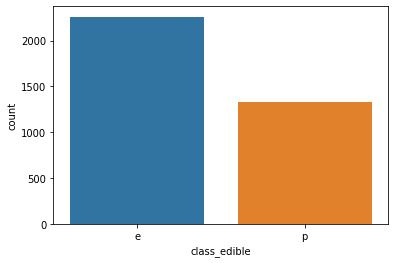

In [54]:
# Diagramma che confronta i funghi commestibili e quelli velenosi
sns.countplot(train_data['class_edible'])

Ora invece mettiamo in relazione le features del dataset con la quantità di funghi velenosi.

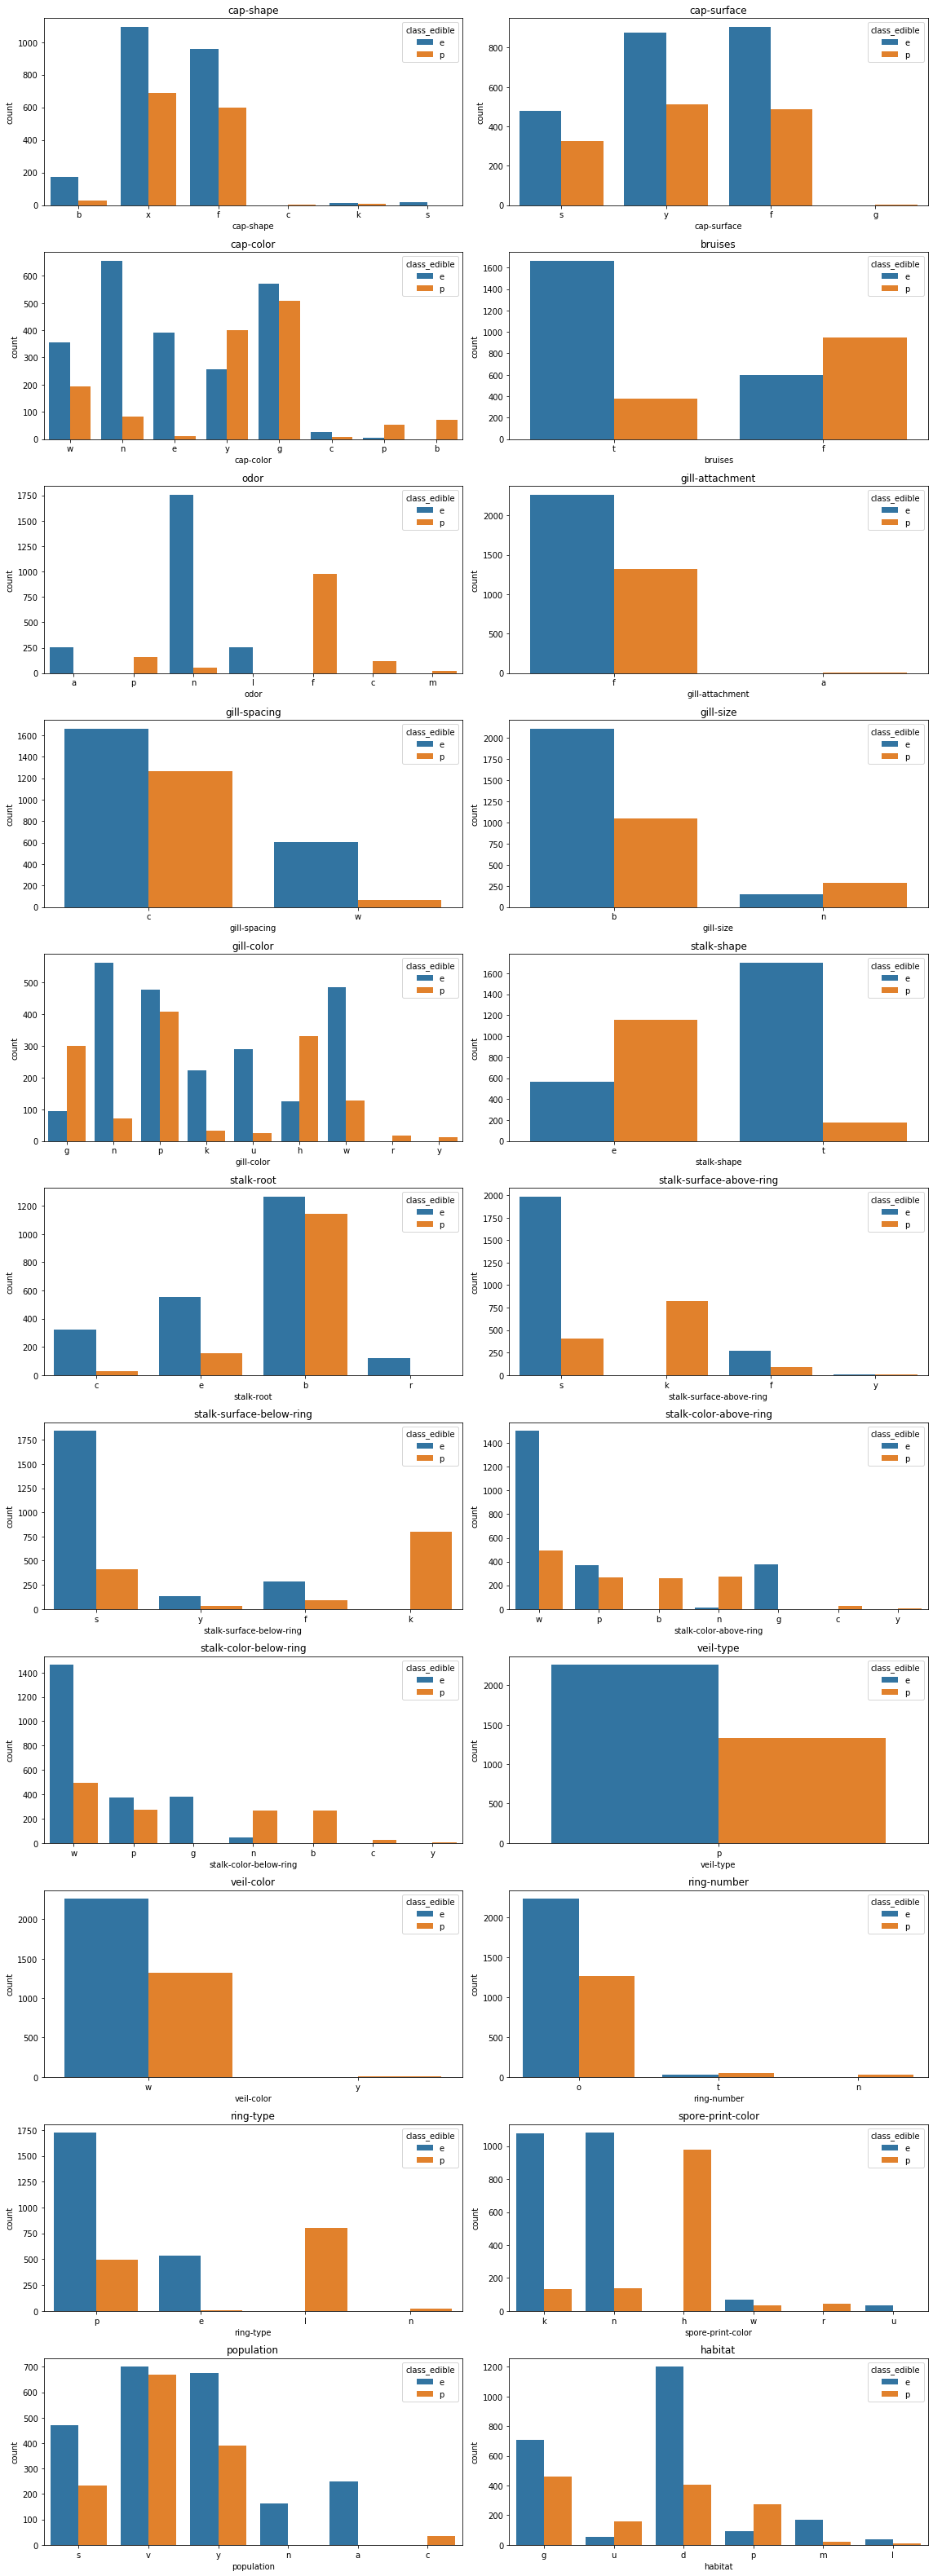

In [55]:
# Alcuni grafici che mettono in relazione le features
# del dataset con la quantità di funghi velenosi

cols = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
        'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color',
        'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']

n_rows = 11
n_cols = 2

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*8, n_rows*4))
i=0
for r in range(n_rows):
    for c in range(n_cols):
        ax = axs[r][c]
        sns.countplot(train_data[cols[i]], hue=train_data['class_edible'], ax=ax)
        ax.set_title(cols[i])
        ax.legend(title='class_edible', loc='upper right')
        i+=1
    
plt.tight_layout()

## Divisione del dataset

In [56]:
# Scegliamo la colonna su cui si desidera addestrare la rete, ovvero
# la nostra 'label'
label = 'class_edible'

# Scegliamo le colonne su cui NON voglimo addestrare il modello
not_features = ['veil-type']

# Estrapoliamo le features come differenza delle due liste precedenti
not_features_all = not_features + [label]
features = [ele for ele in train_data.columns.to_list() if ele not in not_features_all] 

In [57]:
# Dividiamo il train-set e il test-set in due parti così da poter addestrare la rete:
# y che contiene solo la colonna label 'No-show' che consiste nella soluzione al problema
# X che contiene tutte le altre colonne specificate in 'features'.
y_train = train_data.pop(label)
X_train = train_data.drop(not_features, axis=1)

y_val = val_data.pop(label)
X_val = val_data.drop(not_features, axis=1)

y_test = test_data.pop(label)
X_test = test_data.drop(not_features, axis=1)

## Modello

La creazione del modello si divide in due fasi, una prima che si occuperà della fase di preprocessing dei dati del dataset e una seconda in cui verrà dichiarato il classificatore. Questi due verranno poi inseriti in una Pipeline.

### Preprocessing dei dati

Per prima cosa eseguiamo l'encoder sulla colonna label y.

In [58]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.fit_transform(y_val)
y_test = label_encoder.transform(y_test)

Invece di usare una Pipeline si deciderà di codificare i dati attraverso LabelEncoder.

In [59]:
X_train = X_train.apply(LabelEncoder().fit_transform)
X_val = X_val.apply(LabelEncoder().fit_transform)
X_test = X_test.apply(LabelEncoder().fit_transform)

### Creazione del modello

Come modello si è deciso di utilizzare una Random Forest Classifier che sfrutta un algoritmo in cui sono addestrati tanti alberi classificatori per poi prendere quello con risultati migliori.

In [61]:
model = RandomForestClassifier()

Adesso aggiungiamo il modello alla Pipeline.

In [62]:
print(model)

RandomForestClassifier()


## Addestramento

Procediamo ora con l'addestramento del modello tramite il dataset di train.

In [63]:
# Addestramento del modello
model = model.fit(X_train, y_train)

In [71]:
# Calcolo dello score di addestramento del modello
score = model.score(X_train, y_train)

print(f"Training score: {score:.4%}")

Training score: 100.0000%


## Valutazione

Eseguiamo ora una valutazione del modello di apprendimento.

In [65]:
prediction = model.predict(X_val)

In [70]:
prediction_score = accuracy_score(y_pred=prediction, y_true=y_val)

print(f"Prediction Accuracy: {prediction_score:.4%}")

Prediction Accuracy: 100.0000%


## Test

In [72]:
prediction_test = model.predict(X_test)

In [73]:
prediction_test_score = accuracy_score(y_pred=prediction_test, y_true=y_test)

print(f"Prediction Accuracy: {prediction_test_score:.4%}")

Prediction Accuracy: 100.0000%


## Confusion Matrix

In [75]:
# Creazione di una confusion matrix
conf_matr = confusion_matrix(y_test, prediction_test, normalize=None)

In [76]:
# Stampa della confusion matrix
print(conf_matr)

[[698   0]
 [  0 452]]


[[698   0]
 [  0 452]]


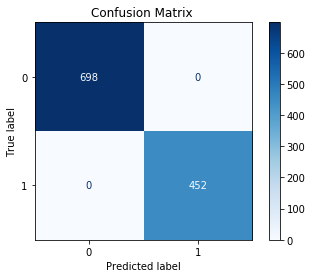

In [90]:
disp = plot_confusion_matrix(model, X_test, y_test,
                                 cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion Matrix ")



print(disp.confusion_matrix)
plt.show()

Dalla confusion matrix è possibile osservare come il modello predica in modo corretto il 100% delle volte.